# Problem Statement
* Hotel cancellations lead to revenue loss and poor planning.
  
  

# Objective
* "The main problem was to understand why hotel bookings get canceled and how it affects hotel revenue.”

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load And Understand Data

In [2]:
df=pd.read_csv(r"C:\Users\mrasi\Desktop\DATA ANALYST PROJECT\HOTEL CANCEL_pastdata.csv")

In [3]:
df.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,NaN
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,NaN
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,No


In [4]:
df.shape

(27093, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


# Data Cleaning

In [6]:
df.isnull().sum()       # “I did this to find missing values so I can clean the data before doing analysis.”

booking_id                        0
lead_time                         0
market_segment_type               0
no_of_special_requests            0
avg_price_per_room                0
no_of_adults                      0
no_of_weekend_nights              0
arrival_date                      0
required_car_parking_space        0
no_of_week_nights                 0
booking_status                    0
rebooked                      18236
dtype: int64

In [7]:
df.drop(columns=['rebooked'], inplace=True)  # “The rebooked column had 100% missing values, so I dropped it because
                                             # it contained no usable information and would not contribute to analysis.

In [8]:
df.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled


In [9]:
df.duplicated().sum()     # After checking missing values, I checked for duplicate records to avoid repeated data affecting the analysis.

np.int64(0)

In [10]:
# After checking duplicates, I found zero duplicate rows, so I kept the data as it is

## Encoding

In [11]:
df['is_canceled'] = df['booking_status'].map({
    'Canceled': 1,
    'Not Canceled': 0
})


In [12]:
df.head()

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,is_canceled
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,0
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,0
2,INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled,0
3,INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled,0
4,INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled,1


# KPI Creation

In [13]:
# 1.Total Bookings
total_bookings = len(df)                          # count the total rows in my dataset
print("Total Bookings:", total_bookings)


Total Bookings: 27093


In [14]:
# 2.Calculate cancel rate                                 # I calculated cancel rate to know how many bookings are canceled. 
cancel_rate = df['is_canceled'].mean() * 100              # This helps the hotel plan better

print("Cancellation Rate:", round(cancel_rate, 2), "%")


Cancellation Rate: 32.69 %


In [15]:
 # 3.Average Lead Time                                # This shows how many days in advance customers book hotels.”
avg_lead_time = df['lead_time'].mean()                # This helps the hotel plan better for staffing, room availability, and pricing strategies.
                                                      
print("Average Lead Time:", round(avg_lead_time, 2), "days")


Average Lead Time: 81.61 days


In [16]:
# Average ADR (Average Daily Rate)                 # I calculated average ADR to know the average price per room. .
avg_adr = df['avg_price_per_room'].mean()          # This helps the hotel understand how much money they earn per room
print("Average ADR:", round(avg_adr, 2))

Average ADR: 101.03


In [17]:
cancel_by_segment = df.groupby('market_segment_type')['is_canceled'].mean() * 100
cancel_by_segment = cancel_by_segment.sort_values(ascending=False)
print("Cancellation Rate by Segment:")                                # This shows which type of customers cancel more, so the hotel can plan better
print(cancel_by_segment)


Cancellation Rate by Segment:
market_segment_type
Online     33.961855
Offline    29.975686
Name: is_canceled, dtype: float64


# Exploratory Data Analysis
* EDA is performed to identify patterns, trends, and factors influencing booking cancellations.”

## Univariate Analysis--Numerical Column

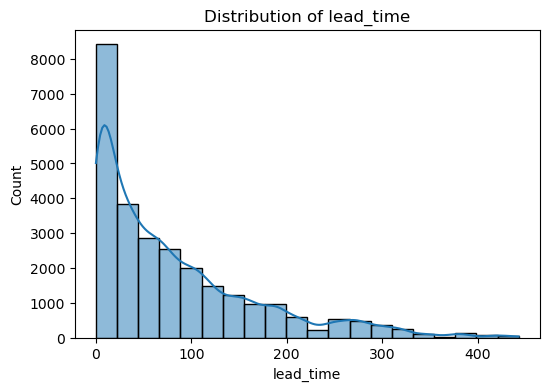

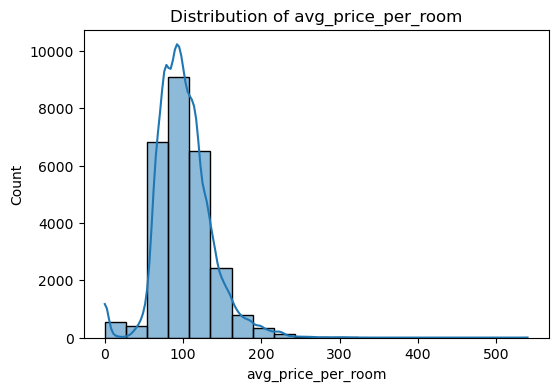

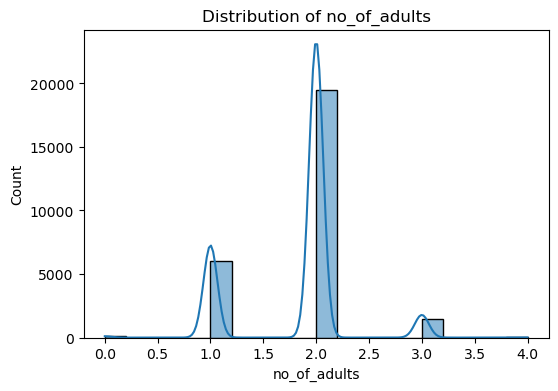

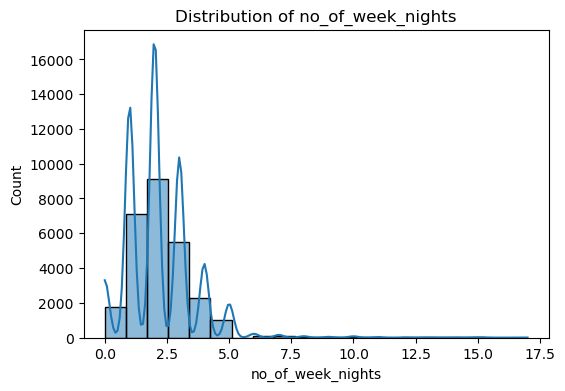

In [18]:
numerical_cols = ['lead_time', 'avg_price_per_room', 'no_of_adults', 'no_of_week_nights']

for col in numerical_cols:
    plt.figure(figsize=(6,4))                         # Histogram →Histograms are used in data analysis to understand distribution,
    sns.histplot(df[col], bins=20, kde=True)          # variability, and data quality.
    plt.title(f'Distribution of {col}') 
    plt.show() 


* Yes, I observed skewness in variables like lead time and ADR.
Since this was an exploratory and business analysis project, I did not remove it because it represents real customer behavior.”

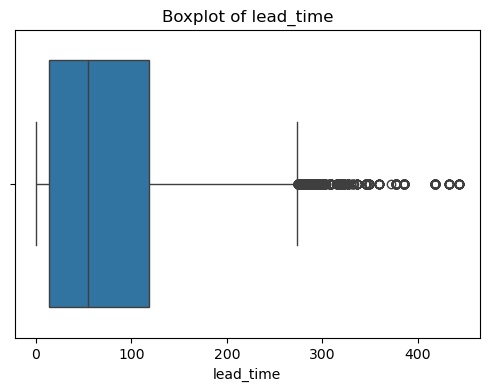

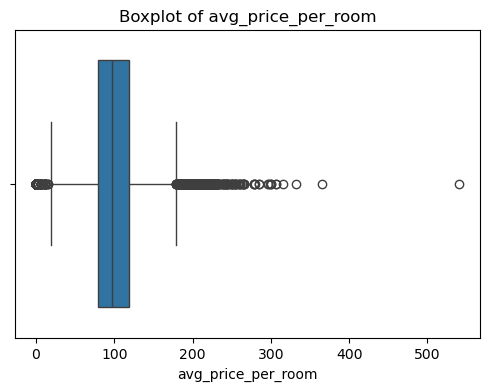

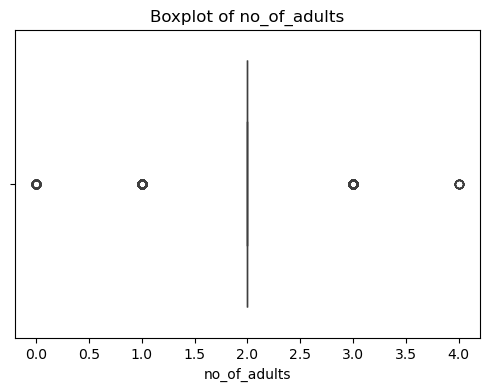

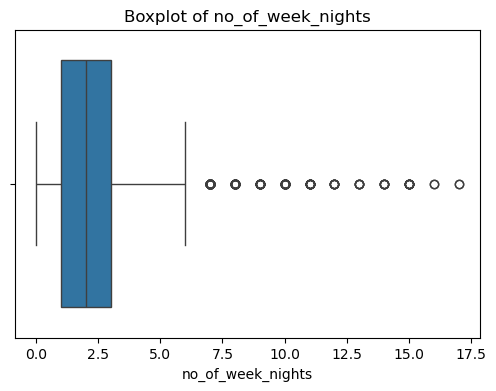

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))                  #Boxplot → Check for outliers or extreme values.
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


* Boxplots show the presence of outliers in lead_time, avg_price_per_room, and stay duration. These outliers represent valid booking behaviors and were retained for analysis

## Bivariate Analysis--Categorical Column

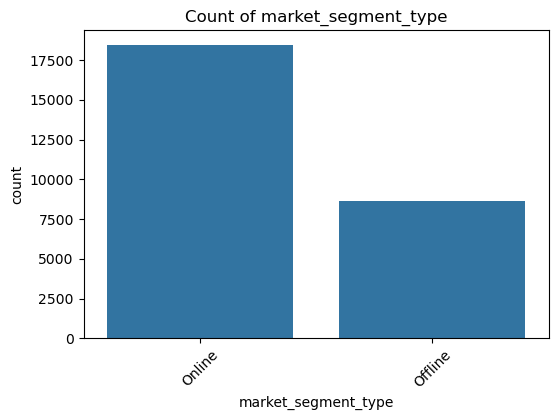

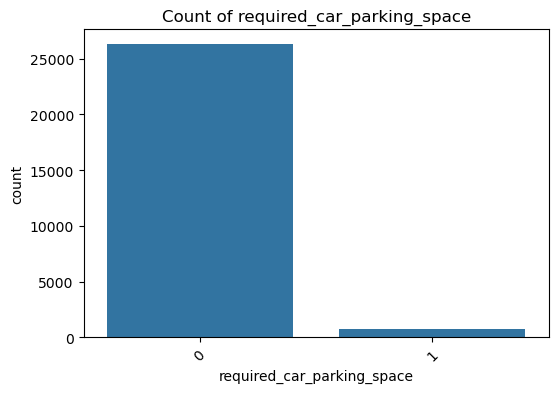

In [20]:
categorical_cols = ['market_segment_type',  'required_car_parking_space']

for col in categorical_cols:                                
    plt.figure(figsize=(6,4))                                     #See which categories are more frequent.
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Quick Frquency Table

In [21]:
for col in categorical_cols:
    print(f"\nFrequency of {col}:")
    print(df[col].value_counts())



Frequency of market_segment_type:
market_segment_type
Online     18456
Offline     8637
Name: count, dtype: int64

Frequency of required_car_parking_space:
required_car_parking_space
0    26311
1      782
Name: count, dtype: int64


## Key Insights from Analysis
* Bookings with longer lead time have higher cancellation probability
* Online market segment shows the highest cancellation rate
* Higher average room price slightly increases cancellations
* Bookings without special requests cancel more


## Business Recommendations
* Bookings with long lead time cancel more, so hotels can ask for partial prepayment.
* Hotels can offer discounts for non-refundable bookings to reduce cancellations.
* Online market segment shows higher cancellations, so special offers or reminders can be sent to these customers.
* Higher room prices lead to more cancellations, so dynamic pricing can be used.
* Sending reminder emails before the stay date can help reduce last-minute cancellations.



## Conclusion

* “In this project, I analyzed hotel booking data to understand cancellation behavior. Using KPIs and EDA, I found that lead time, customer type, and booking segment strongly affect cancellations. These insights can help hotels reduce cancellations and improve revenue planning.”